# Wordcloud Demo

## Intended to scrape through a number of news RSS Feeds and generate wordclouds from the results

In [1]:
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import numpy as np
from newspaper import Article
import nltk
import pandas as pd
from PIL import Image
import requests
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

### Setup your RSS Feeds

In [2]:
feeds = ['http://rss.cnn.com/rss/cnn_topstories.rss',
'http://rss.cnn.com/rss/cnn_world.rss',
'https://rss.nytimes.com/services/xml/rss/nyt/World.xml',
'https://www.huffpost.com/section/front-page/feed?x=1',
'http://feeds.foxnews.com/foxnews/world',
'http://rssfeeds.usatoday.com/UsatodaycomNation-TopStories',
'https://www.politico.com/rss/politicopicks.xml',
'https://www.yahoo.com/news/rss',
'http://feeds.abcnews.com/abcnews/topstories',
'http://www.npr.org/rss/rss.php?id=1001',
'https://nypost.com/feed/',
'https://www.theguardian.com/world/rss',
'https://globalnews.ca/feed/']

### Pull URLs in from your RSS Feeds

In [3]:
articles = []

for feed in feeds:
    response = requests.get(feed)
    webpage = response.content
    soup = BeautifulSoup(webpage, features='xml')
    
    items = soup.find_all('item')
    
    for item in items:
        link = item.find('link').text
        articles.append(link)

### Download and Parse through your URLs

In [4]:
data = []

for url in articles:
    info = Article(url)
    try:
        info.download()
        info.parse()
        info.nlp()
        keywords = info.keywords
        text = info.text
        save = [url, keywords, text]
        data.append(save)
    except:
        ## Packing this all in to a try statement to handle bad urls that are sometimes included 
        continue

### Put your list of lists into a dataframe

In [5]:
label = ['URL', 'Keywords','Text']
df = pd.DataFrame(data)
df.columns = label

In [6]:
df.head()

,URL,Keywords,Text
0,http://rss.cnn.com/~r/rss/cnn_topstories/~3/R3...,"[vaccines, recorded, schools, booster, million...",(CNN) The US has now tallied more than 40 mill...
1,http://rss.cnn.com/~r/rss/cnn_topstories/~3/tb...,"[dr, rfl, pushes, desantis, gov, completely, i...",Dr. Anthony Fauci pushes back on a claim by Go...
2,http://rss.cnn.com/~r/rss/cnn_topstories/~3/ew...,"[students, schools, health, pandemic, care, nu...",(CNN) As she held up her cell phone to take ba...
3,http://rss.cnn.com/~r/rss/cnn_topstories/~3/F0...,"[house, texas, analysis, americans, shape, mid...",(CNN) President Joe Biden must define the poli...
4,http://rss.cnn.com/~r/rss/cnn_topstories/~3/OS...,"[schools, mitigation, coronavirus, followed, v...",(CNN) Back-to-school after the Labor Day weeke...


### Stop words

In [7]:
## Though there is a set of default stop words (stuff to not be included), sometimes you want to add
stopwords = set(STOPWORDS)
stopwords.update(['rt','guardian','abc','nbc','cbs','nytimes','globalnews','state'])
print(stopwords)

{'to', "why's", "they've", 'with', 'yourself', 'globalnews', "she'd", "there's", "we'll", 'herself', 'our', 'once', 'i', "couldn't", 'off', 'they', 'him', "mustn't", 'does', 'themselves', "we'd", "isn't", 'hence', 'rt', 'not', 'myself', 'or', 'their', 'abc', "they're", 'having', 'both', 'r', 'some', 'under', 'few', 'about', "shan't", 'until', 'himself', 'as', 'against', 'like', 'what', 'while', 'when', 'a', "what's", "wouldn't", 'ours', "didn't", 'his', 'can', 'me', "she's", 'it', 'no', 'did', 'cannot', 'she', 'who', "where's", 'same', 'these', 'below', 'this', 'be', 'www', 'nytimes', 'in', 'for', 'its', 'each', 'between', 'such', 'that', 'your', "hasn't", 'more', "they'd", 'all', 'doing', "we've", "that's", 'shall', 'why', "hadn't", "you've", "weren't", 'was', 'again', 'over', 'have', 'been', 'hers', 'further', "don't", 'get', 'than', 'up', "i'm", 'just', "he's", 'otherwise', 'through', 'nbc', 'do', 'whom', 'being', 'where', "they'll", 'also', 'down', "here's", "won't", 'k', 'very', '

#### Single Article Example

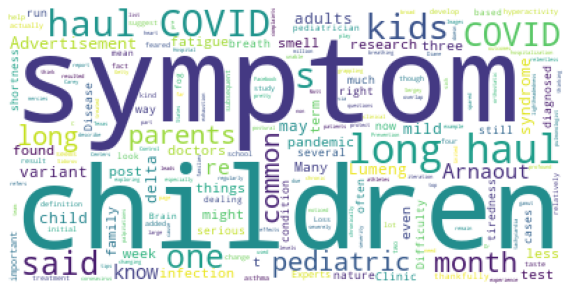

In [8]:
text = df.Text[177]

wordcloud = WordCloud(stopwords=stopwords,max_words=200,background_color='white').generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wordcloud)
plt.axis('off')
plt.show;

#### All Keywords from all articles

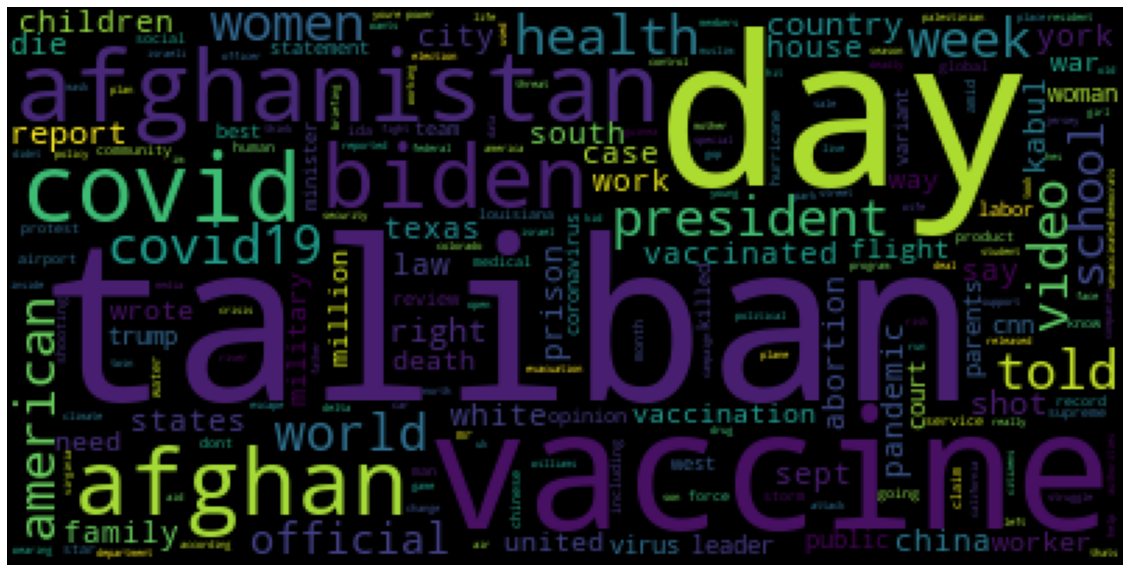

In [9]:
keywords = [j for i in df.Keywords for j in i]

text = ' '.join(i for i in keywords)
new_wordcloud = WordCloud(stopwords=stopwords,collocations=False).generate(text)

plt.figure(figsize=[20,20])
plt.imshow(new_wordcloud)
plt.axis('off')
plt.show;

#### Playing with image masking

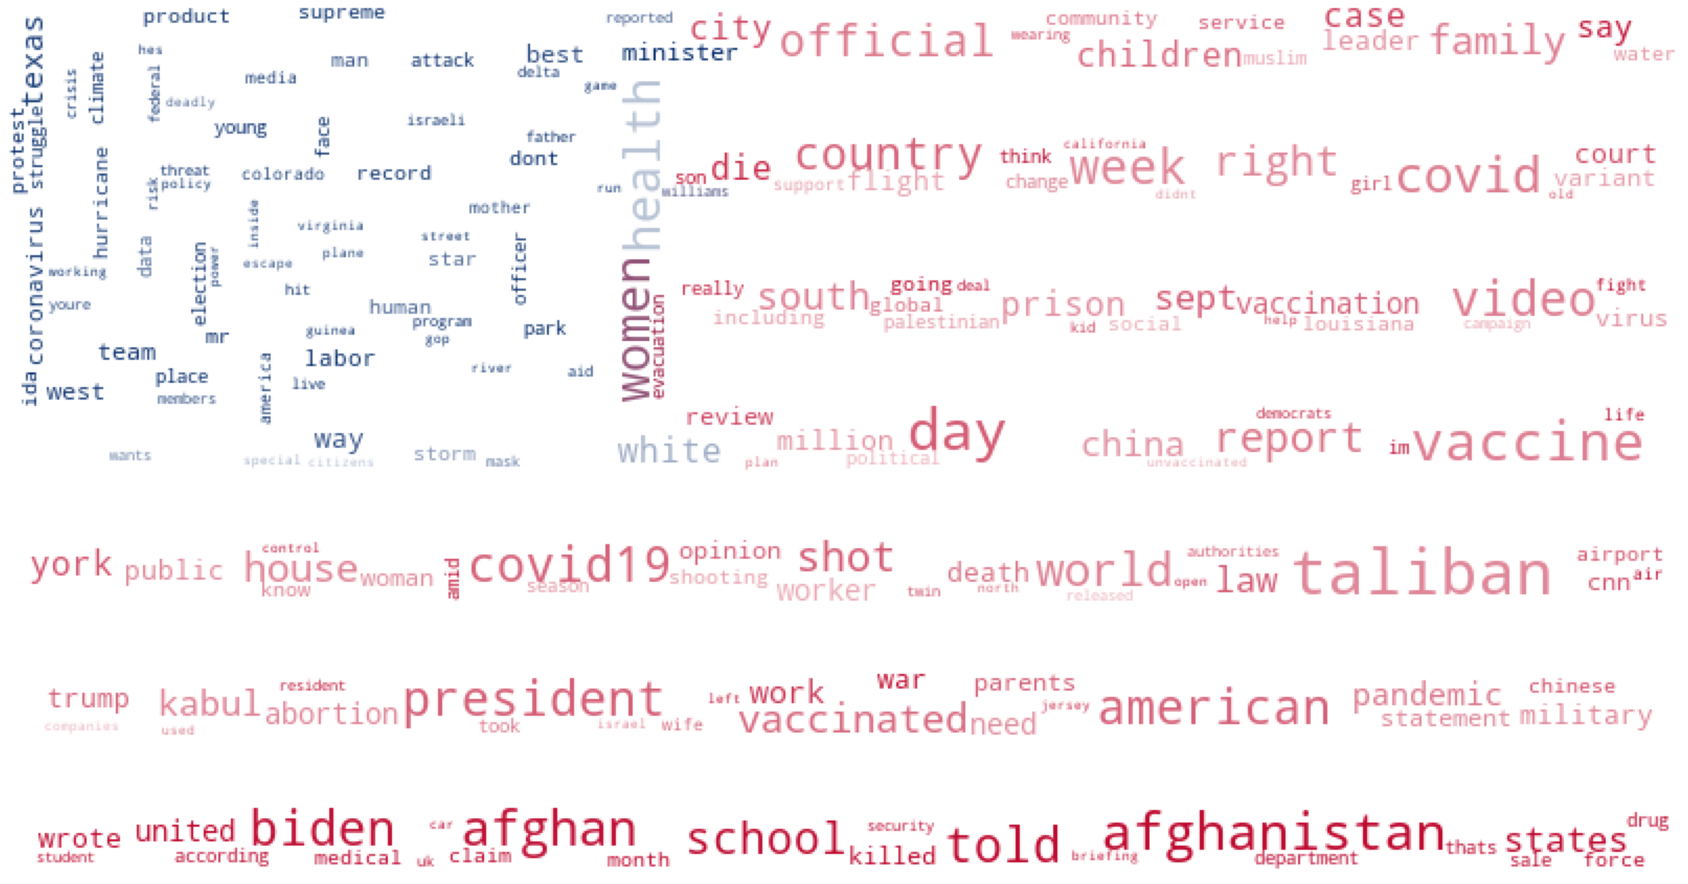

In [10]:
frame = np.array(Image.open('Flag.jpg'))
flag_wordcloud = WordCloud(stopwords=stopwords,collocations=False,background_color='white',mask=frame).generate(text)

image_colors = ImageColorGenerator(frame)
plt.figure(figsize=[30,30])
plt.imshow(flag_wordcloud.recolor(color_func=image_colors))
plt.axis('off')
plt.show;

#### Other Examples of Word Masks

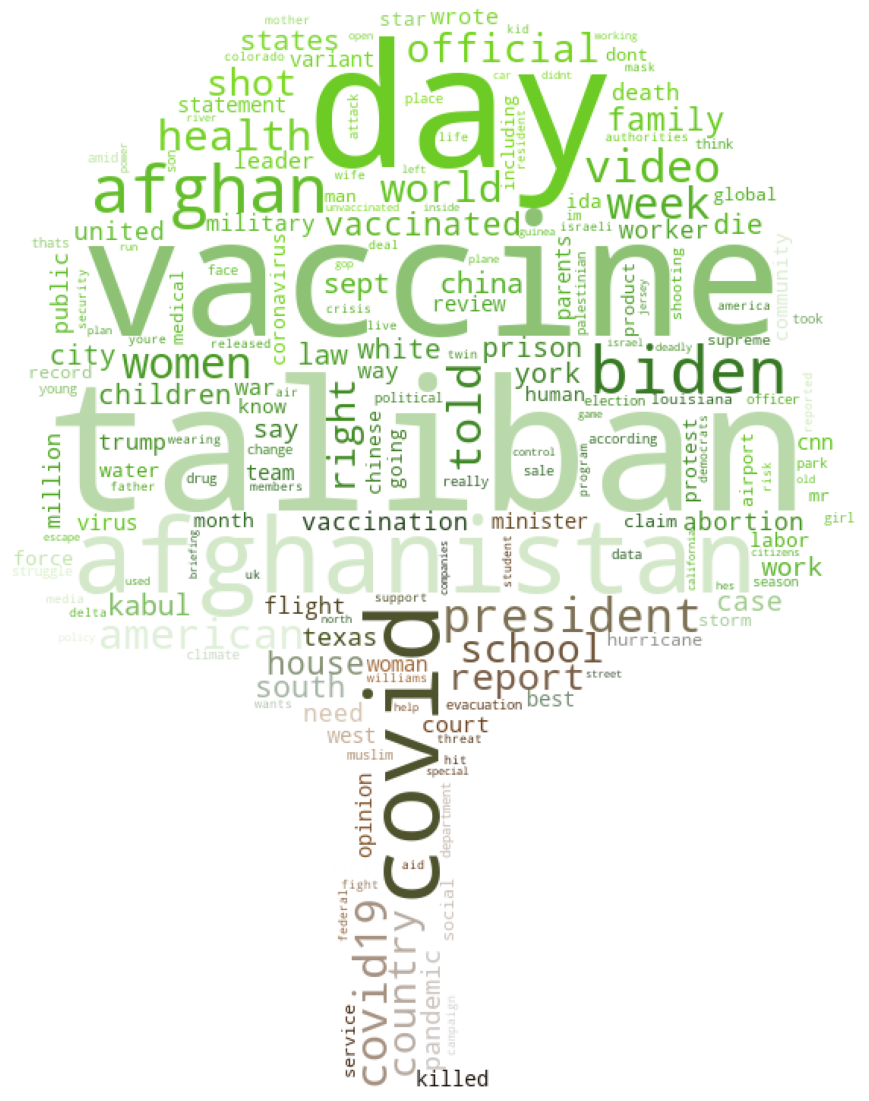

In [11]:
frame = np.array(Image.open('Tree.jpg'))
flag_wordcloud = WordCloud(stopwords=stopwords,collocations=False,background_color='white',mask=frame).generate(text)

image_colors = ImageColorGenerator(frame)

plt.figure(figsize=[20,20])
plt.imshow(flag_wordcloud.recolor(color_func=image_colors))
plt.axis('off')
plt.show;

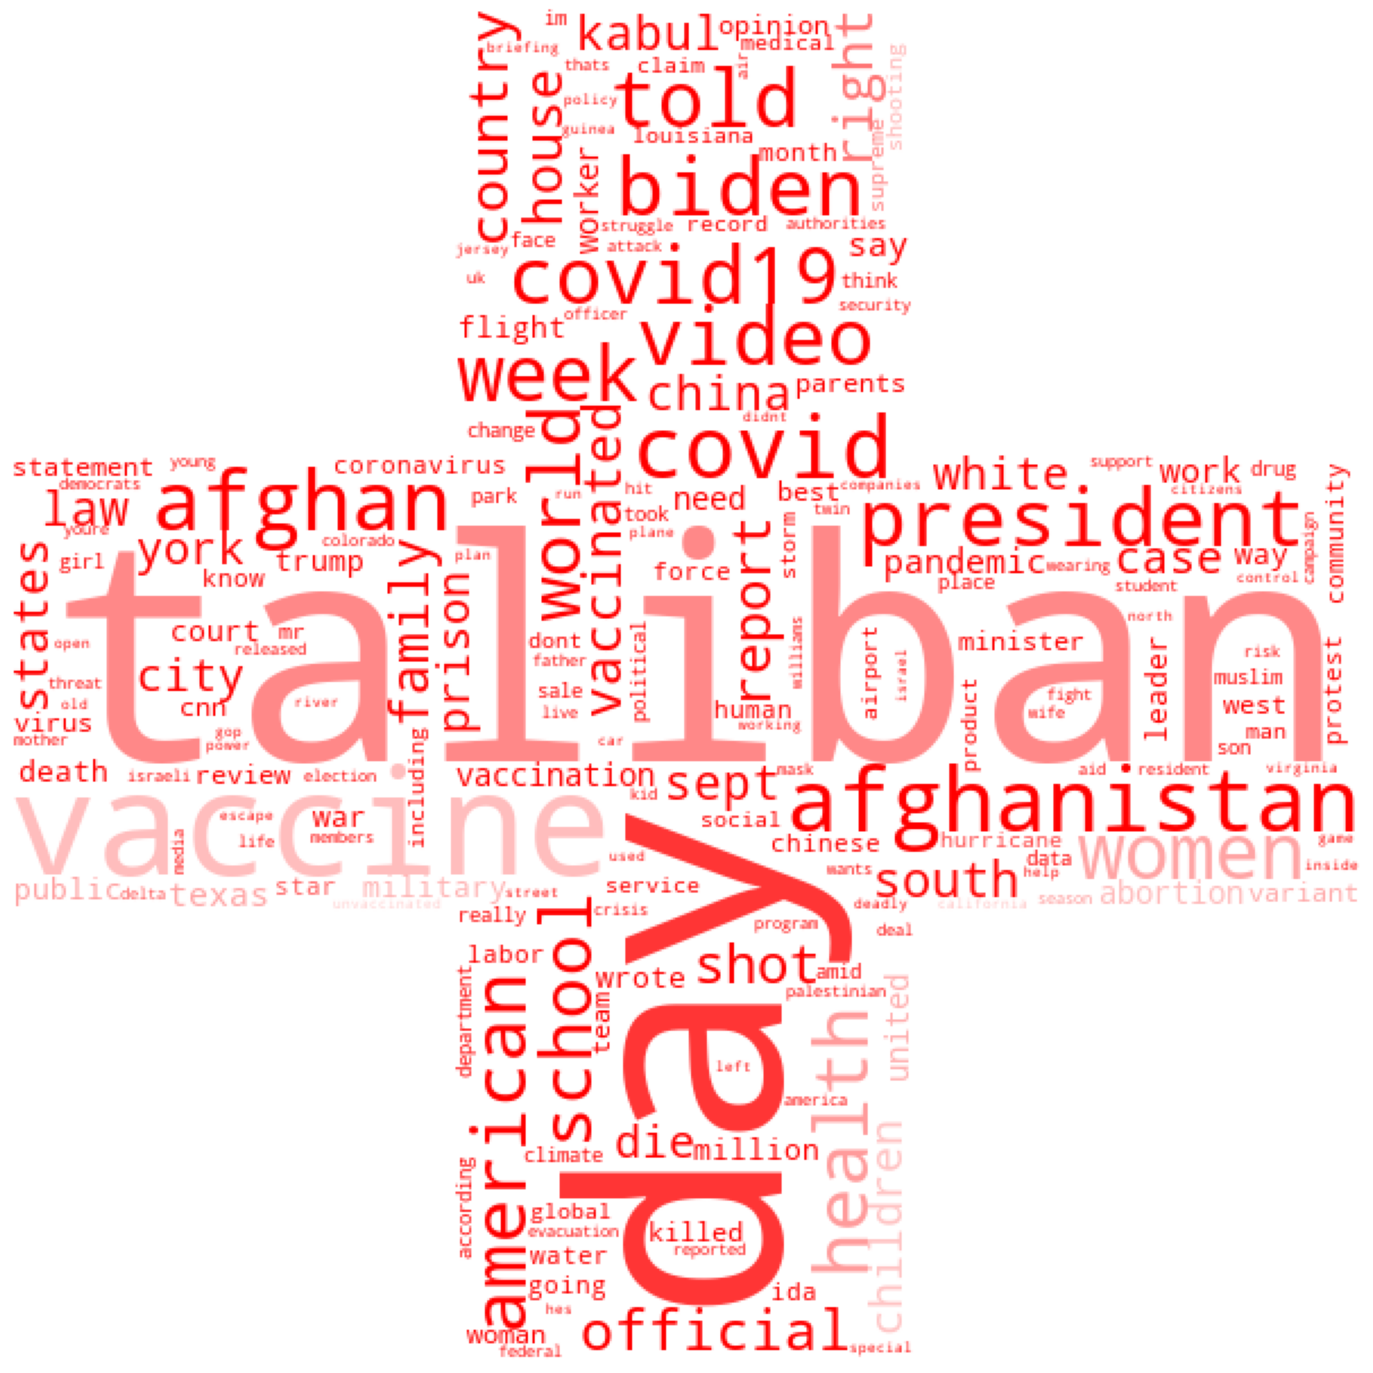

In [14]:
frame = np.array(Image.open('ARC.png'))
flag_wordcloud = WordCloud(stopwords=stopwords,collocations=False,background_color='white',mask=frame).generate(text)

image_colors = ImageColorGenerator(frame)

plt.figure(figsize=[25,25])
plt.imshow(flag_wordcloud.recolor(color_func=image_colors))
plt.axis('off')
plt.show;

<a href = "https://www.youtube.com/watch?v=aGgnM-Eu3Wg">Original Video</a>